# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results
target_pos = np.array([2., 2., 10.,0.,0.,0.])    # target position for reward function

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w', newline='\n') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

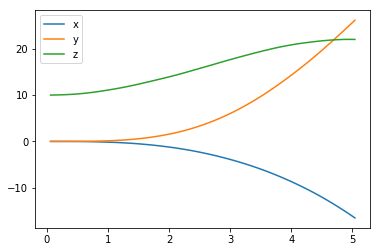

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

In [4]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import math

def plot_flight(flight_path, target_pos, episode=None, fig = None):
    x = flight_path[0]
    y = flight_path[1]
    z = flight_path[2]
    mpl.rcParams['legend.fontsize'] = 15

    if fig == None:
        fig = plt.figure()
        fig.set_size_inches(12, 12)
    ax = fig.gca(projection='3d')

    ax.plot(x,y,z, label='Flight of the Quadcopter')
    ax.plot([target_pos[0]], [target_pos[1]], [target_pos[2]], ms=8, lw=2, marker='x', alpha=0.75, label='Target')
    ax.plot([x[0]],[y[0]],[z[0]] ,    ms=8, lw=2, marker='o', color='g', label='Start')
    ax.plot([x[-1]],[y[-1]],[z[-1]] , ms=8, lw=2, marker='x', color='g', label='End')
    #ax.legend()
    xmax = np.max(x)
    xmin = np.min(x)
    ymax = np.max(y)
    ymin = np.min(y)
    zmax = np.max(z)
    zmin = np.min(z)
    #zmax = np.max(z)
    plt_buffer = 2
    pltmax = math.ceil(max(xmax,ymax) + plt_buffer)
    ax.set_xlim(-pltmax,pltmax)
    ax.set_ylim(-pltmax,pltmax)
    #ax.set_zlim(0,pltmax)
    if episode != None:
        title_txt = 'Episode ' + str(episode)
    else:
        title_txt = 'No Episode'
    if z[0] > 0:
        title_txt += '. Flight starts in mid-air at z=' + str(np.round(z[0])) + '. Range Max is ' + str(pltmax)
    plt.title(title_txt)
    ax.set_xlabel('X (' + str(round(xmin,1)) + ', ' + str(round(xmax,1)) + ')')
    ax.set_ylabel('Y (' + str(round(ymin,1)) + ', ' + str(round(ymax,1)) + ')')
    ax.set_zlabel('Z (' + str(round(zmin,1)) + ', ' + str(round(zmax,1)) + ')')
    plt.show()


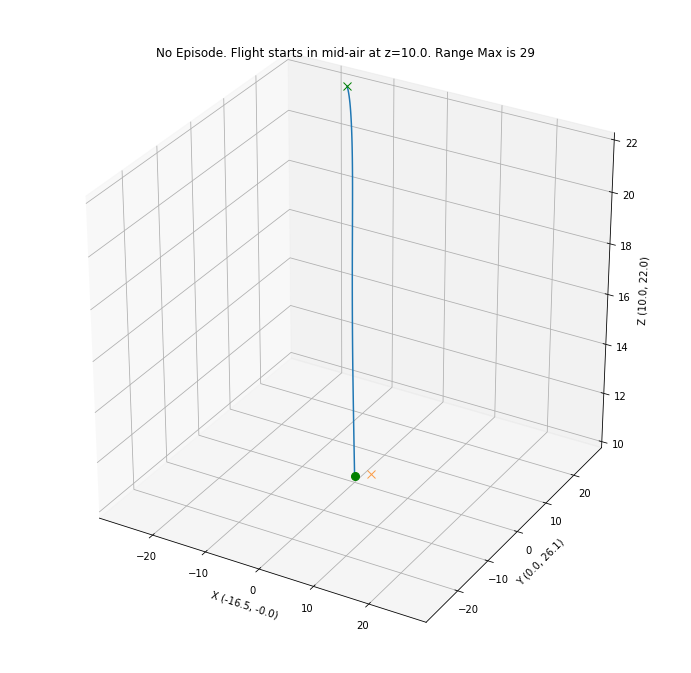

In [5]:
plot_flight([results['x'], results['y'], results['z']], target_pos)

In [6]:
#from matplotlib import cm
#fig = plt.figure()
#fig.set_size_inches(12, 12)
#ax = fig.add_subplot(111, projection='3d')

#Make data
#target = [5,5,10]

#Plot the surface
#alpha = .2
#for x in range(0,20,2):
#    for y in range(0,20,2):
#        for z in range(0,20,2):
#            V = 1 / np.exp(np.abs(x-target[0])*alpha + np.abs(y-target[1])*alpha + np.abs(z-target[2])*alpha)
#            ax.plot([x], [y], [z], color='g', alpha=V, marker='.')
#ax.plot(results['x'],results['y'],results['z'], label='Flight of the Quadcopter')
#plt.title('Plot of Value Function around ' + str(target))
#plt.show()

The next code cell visualizes the velocity of the quadcopter.

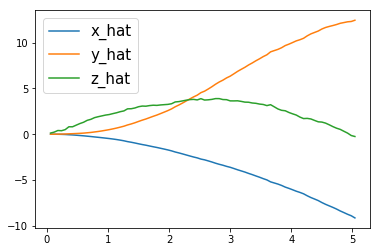

In [7]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

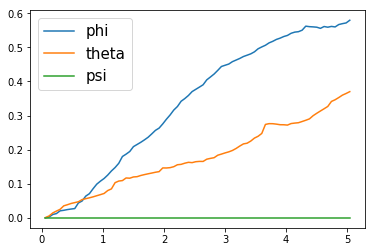

In [8]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

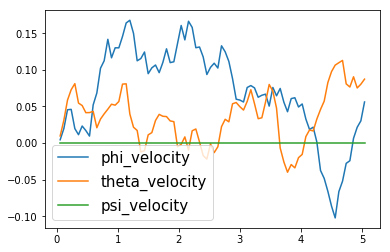

In [9]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

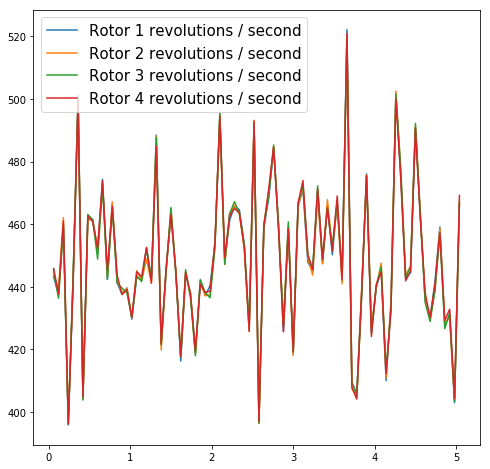

In [10]:
fig = plt.figure()
fig.set_size_inches(8, 8)
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [11]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-16.51085805  26.1477839   22.00574769   0.57950506   0.3701942    0.        ]
[ -9.15141413  12.45510969  -0.25227858]
[ 0.05613667  0.08736382  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [12]:
import sys
#import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 100
target_pos = np.array([0., 0., 10., 0., 0., 0.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  100, score =  -1.861 (best =  -1.368), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [13]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from datetime import datetime
from task import Task
from Log import Log


# Modify the values below to give the quadcopter a different starting position.
runtime = 10.                                    # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 100.])       # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([0., 0., 20., 0., 0., 0.]) # target position for reward function
file_output = 'project_data'                     # file name for saved results
start_time = datetime.now()
file_output += str(start_time.strftime('%Y-%m-%d %H-%M-%S')) + '.csv'
log=None #Log()

# Setup

print('Start Time:' + str(start_time))
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)
agent = DDPG(task, log)
done = False
rewards_list = []
total_reward = []
num_episodes = 150
# Added reward and total_reward
labels = ['episode','time', 'reward', 'total_reward', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
#results = {x : [] for x in labels}

with open(file_output, 'w', newline='\n') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    plot_flag = False

    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        #plt_pose = []
        total_reward = 0
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state
            total_reward += reward
            to_write = [i_episode] + [task.sim.time] + [reward] + [total_reward] + list(task.sim.pose) + list(task.sim.v) \
                        + list(task.sim.angular_v) + list(action)
            #plt_pose.append(list(task.sim.pose))
            #for ii in range(len(labels)):
            #    results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            if (reward > 20) & (i_episode % 25 == 0):
                plot_flag = True
                print('Plot at episode', i_episode,' reward', reward)
        
            if done:
                curr_time = datetime.now()
                seconds = (curr_time - start_time).total_seconds()
                rate = i_episode / seconds
                print("\rEpisode = {:4d}, score = {:7.3f} total = {:7.3f} (best = {:7.3f}) Est. Time Left: {} min        "\
                      .format(i_episode, agent.score, total_reward, agent.best_score, \
                      round(((num_episodes - i_episode)/rate)/60,1)), end="")  # [debug]
                #rewards_list.append((i_episode, agent.best_score))
                rewards_list.append((i_episode, total_reward))
                #if plot_flag:
                #    plot_flight(plt_pose, target_pos, i_episode)
                break
        sys.stdout.flush()

if log != None:
    log.close()

Using TensorFlow backend.


Start Time:2018-04-13 14:42:16.638484
Episode =    4, score =   0.000 total =  -3.000 (best =    -inf) Est. Time Left: 2.1 min         

D:\USERS\GARY\DeepLearning\RL-Quadcopter-2\physics_sim.py:116: RuntimeWarning: overflow encountered in double_scalars
  C_T = max(.12 - .07*max(0, J)-.1*max(0, J)**2, 0)
D:\USERS\GARY\DeepLearning\RL-Quadcopter-2\physics_sim.py:69: RuntimeWarning: overflow encountered in square
  linear_drag = 0.5 * self.rho * self.find_body_velocity()**2 * self.areas * self.C_d


Episode =  150, score =     nan total =     nan (best =    -inf) Est. Time Left: 0.0 min        

In [14]:
df = pd.read_csv(file_output)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

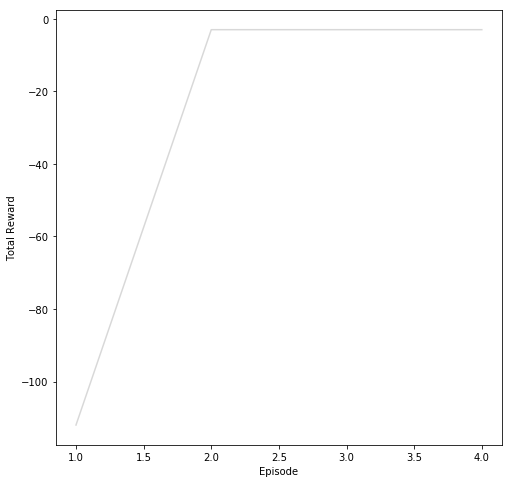

In [15]:
## TODO: Plot the rewards from rewards_list.
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

eps, rews = np.array(rewards_list).T
smoothed_rews = running_mean(rews, 10)
fig = plt.figure()
fig.set_size_inches(8, 8)

plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total Reward')

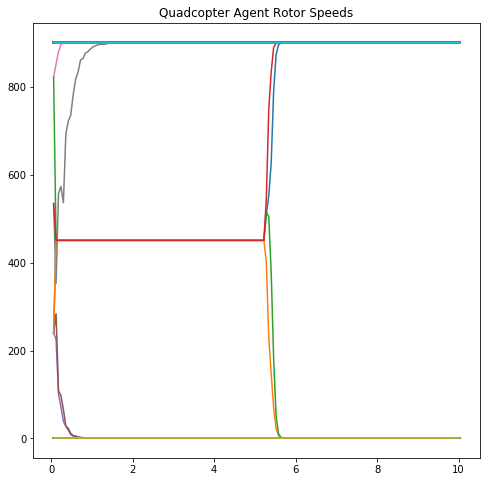

In [16]:
fig = plt.figure()
fig.set_size_inches(8, 8)
plt.title('Quadcopter Agent Rotor Speeds')
for i_episode in range(num_episodes):
    #plt.plot(df[df['episode']==i_episode]['time'], df[df['episode']==i_episode]['rotor_speed1'], label='Rotor 1 revolutions / second')
    plt.plot(df[df['episode']==i_episode]['time'], df[df['episode']==i_episode]['rotor_speed1'])
    plt.plot(df[df['episode']==i_episode]['time'], df[df['episode']==i_episode]['rotor_speed2'])
    plt.plot(df[df['episode']==i_episode]['time'], df[df['episode']==i_episode]['rotor_speed3'])
    plt.plot(df[df['episode']==i_episode]['time'], df[df['episode']==i_episode]['rotor_speed4'])
#plt.legend(loc=0)
_ = plt.ylim()

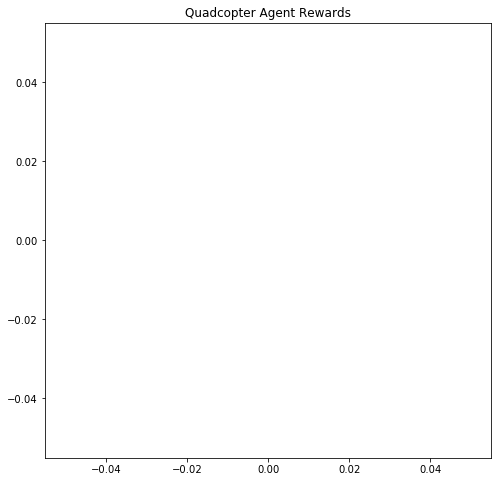

In [17]:
fig = plt.figure()
fig.set_size_inches(8, 8)
plt.title('Quadcopter Agent Rewards')
#for i_episode in range(num_episodes):
for i_episode in ([5,num_episodes]):
    plt.plot(df[df['episode']==i_episode]['time'], df[df['episode']==i_episode]['reward'])
_ = plt.ylim()

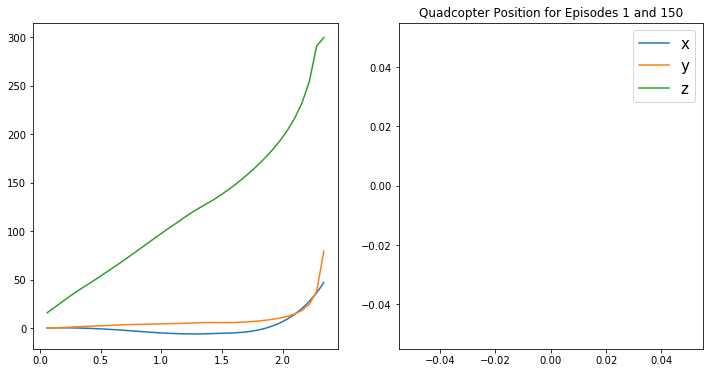

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(12, 6)
ax1.plot(df.loc[df['episode']==1]['time'], df.loc[df['episode']==1]['x'].values, label='x')
ax1.plot(df.loc[df['episode']==1]['time'], df.loc[df['episode']==1]['y'].values, label='y')
ax1.plot(df.loc[df['episode']==1]['time'], df.loc[df['episode']==1]['z'].values, label='z')

ax2.plot(df.loc[df['episode']==i_episode]['time'], df.loc[df['episode']==i_episode]['x'].values, label='x')
ax2.plot(df.loc[df['episode']==i_episode]['time'], df.loc[df['episode']==i_episode]['y'].values, label='y')
ax2.plot(df.loc[df['episode']==i_episode]['time'], df.loc[df['episode']==i_episode]['z'].values, label='z')
plt.legend()
plt.title('Quadcopter Position for Episodes 1 and ' + str(i_episode))
_ = plt.ylim()

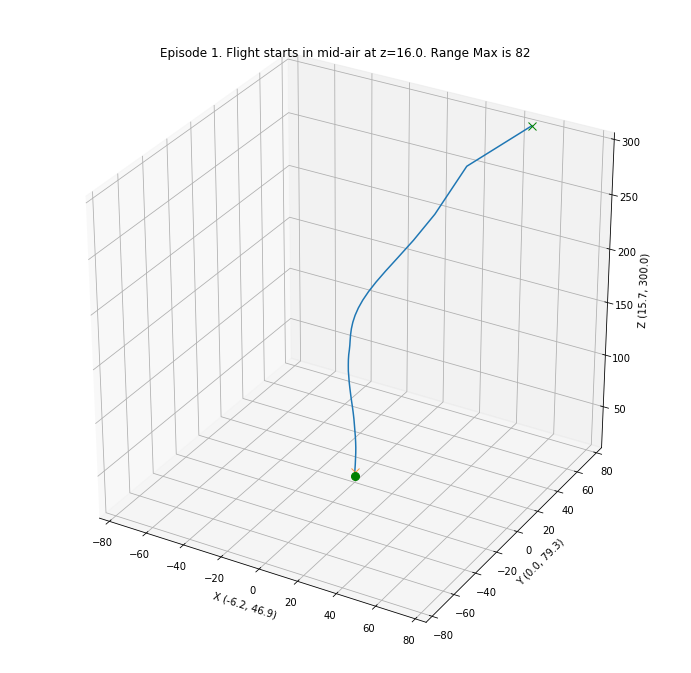

ValueError: cannot convert float NaN to integer

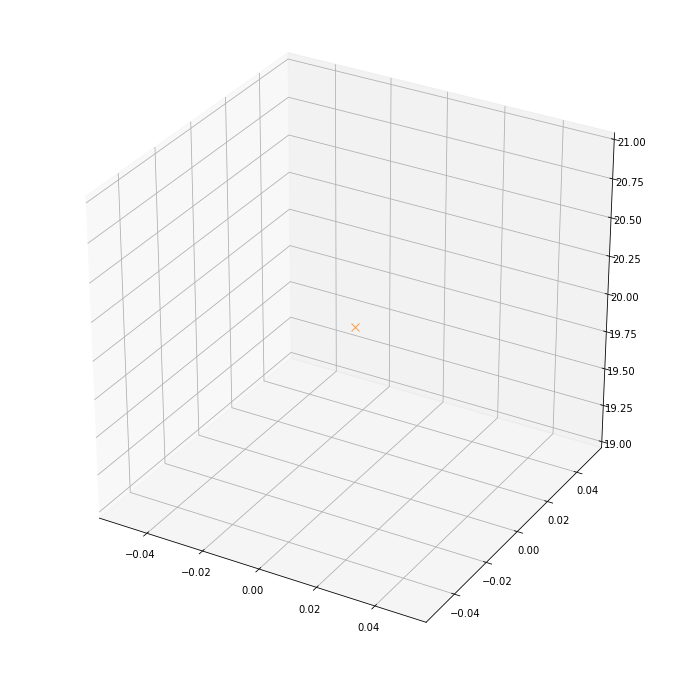

In [19]:
i_episode = num_episodes
plot_flight([df.loc[df['episode']==1]['x'].values
            , df.loc[df['episode']==1]['y'].values
            , df.loc[df['episode']==1]['z'].values], target_pos, 1)
plot_flight([df.loc[df['episode']==i_episode]['x'].values
            , df.loc[df['episode']==i_episode]['y'].values
            , df.loc[df['episode']==i_episode]['z'].values], target_pos, i_episode)

In [ ]:
df.loc[df['episode']==i_episode]['z'].values

In [ ]:
plt.plot(df.loc[df['episode']==i_episode]['time'], df.loc[df['episode']==i_episode]['phi'].values, label='phi')
plt.plot(df.loc[df['episode']==i_episode]['time'], df.loc[df['episode']==i_episode]['theta'].values, label='theta')
plt.plot(df.loc[df['episode']==i_episode]['time'], df.loc[df['episode']==i_episode]['psi'].values, label='psi')
plt.legend()
plt.title('Euler Angles for Episode ' + str(i_episode))
_ = plt.ylim()

In [ ]:
plt.plot(df.loc[df['episode']==i_episode]['time'], df.loc[df['episode']==i_episode]['phi_velocity'].values, label='phi')
plt.plot(df.loc[df['episode']==i_episode]['time'], df.loc[df['episode']==i_episode]['theta_velocity'].values, label='theta')
plt.plot(df.loc[df['episode']==i_episode]['time'], df.loc[df['episode']==i_episode]['psi_velocity'].values, label='psi')
plt.legend()
plt.title('Euler Velocities for Episode ' + str(i_episode))
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I chose the task of getting the craft to hover at a particular position. I tried the following functions:
1. My own based on x,y,z coordinates which rewarded it based on how close it was. I used exp to constrain it between 0 and 1 and another alpha factor to spread the function out.
2. The given function since that had negative consequences for being too far away.
3. Modified the given function to include the euler angles. Increased target pos to include euler angles.
4. Modified the function to make position count 3x more than euler angles.
5. Tried to radically alter the amounts: instead of 3 - the difference, used 30 - the difference. Then changed position multiplier to 10x from 3x. Kept euler angle difference penalty to the same.
6. I'm thinking that the reward function is the cause of the motors dropping to zero no matter what. It returns negative rewards most of the time and that would translate into negative actions, which translate into 0 motor speeds. I'm going to return to my first value function, altered to include euler angles and magnified since we want to learn quickly. I'll know within 200 episodes if things are going differently. BTW, the learning rate is still at 0.75.
7. Going to drop the reward function back to [0,1] and drop the lr to 0.1. Trying sqrt instead of exp.
8. Changed alpha on the reward function to 0.1 to expand larger reward area.
9. Make new reward function that is [-1,1] using a tanh.  Did worse. Reverting...
10. Reverting again to tanh with a smaller range.  I cannot seem to crack this.
11. Trying with making the position valued more again.
12. Modified equation 10. Final equation used was this one. np.tanh(1-.2*((abs(self.sim.pose - self.target_pos)).sum())) / 1

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: I chose the given DDPG actor-critic method since that is state-of-the art and I wanted to focus on tuning hyperparameters.

Reduced the numbr of nodes in the second hidden layer from 64 to 48 to help speed up the training. Didn't help, so increased them.
Built some real-time feedback to I can see what the craft is doing. Indicated whenever the reward went positive.

- Increased the noise by 10x. That didn't help. Returned it to default.
- Increased the soft update by 10x.  That didn't help.
- Played around with constraining the action range.  That didn't help. The craft is bent on going to the moon.
- Changed lr = 0.1 in Critic and Actor. Might have helped. At least it no longer is trying to send it to the moon.  Now the problem is that the motors are cutting out to around minimum.
- Boosted batch size to 128. Sped up the simulation, but didn't help.
- Changed runtime to 15 after noticing that the reward was starting to increase near the end of runtime 5
- Change lr = 0.2 in Critic and Actor.  The motors are still cutting out. Checked with 500 episodes.
- Change lr = 0.5 in Critic and Actor.  Doesn't look promising.  Checked with 500 episodes.
- Change lr = 0.75 in Critic and Actor. Checked for 1000 episodes.
- Added clipvalue=0.5 to Adam for both Critic and Actor after reading that this can help the rotors from running to extremes. It didn't help. Rotors still going to extremes.
- Reduced clipvalue = 0.25. Reduced noise. Increased batch_size to 500.  Didn't work. 3 rotors going to max.
- Reduce batch_size to 64.
- Restoring $\gamma$ to 0.99 and $\tau$ to 0.01
- Adding dropout to the Actor of 50% to the last two layers.  Did something. The 100 episode sample looks quite different.
- Keeping dropout and increasing noise.  Started flying to the moon again.  The reward function was not responsive enough. It maxed out too soon.  All the action gradients go to 0 within a very few episodes and stay there.
- Since the Critic is not giving any suggestions for changes to the Actor (i.e., the action_gradients are all 0's), I am going to try setting $\gamma$ to 0.5. Didn't work, even with a change to the lr for the critic back to 0.01
- Next I am going to try to normalize the actions input to the critic to [0,1] so they don't overwhelm the state inputs.  Still trying to figure out why it stops learning.

Final run had:
 $\gamma$ = 0.99,
 $\tau$ = 0.01,
 $\mu$ = 0.001,
 $\theta$ = 0.05,
 $\sigma$ = 0.00.15,
 lr for both Critic and Actor = 0.1

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:  I chose the hover task and it was impossible to completely learn with my reward functions. It did learn to constrain the x and y axis, but never the z. The only progress I saw there was that the agent stopped flying off and instead brought the craft back to the ground.

At times, there seemed to be an aha moment, but that seemed to only affect the x,y axis, not the z so the total reward went from extremely negative to just very negative and then the total reward would hover there indefinitely.  I found out later that the action learning gradients had gone to zero so it had stopped learning. I have not debugged that issue yet.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
I found defining the reward function for the task the most challenging. I struggled with understanding how a gradient to adjust Q could translate into motor speeds. I could see the craft acting somewhat rationally according to some of my reward functions: e.g., when I used the modified original function that could get negative rewards, the craft would opt to land quickly since that got a higher expected reward than flying to the moon. It did learn somewhat in that it didn't wander around in its flight path. That can be seen in the plots of the first vs. last flight above.  When I had the exp function which had no negative rewards, it would just fly to the moon. The biggest problem (which I have not solved) is getting the motor speeds to not go to extremes.

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
#py.offline.init_notebook_mode(connected=True)

#x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
i_episode=1
x = df.loc[df['episode']==i_episode]['x'].values
y = df.loc[df['episode']==i_episode]['y'].values
z = df.loc[df['episode']==i_episode]['z'].values
trace0 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(217, 217, 217, 0.8)',
            width=0.5
        ),
        opacity=0.8
    )
)

i_episode=num_episodes
x2 = df.loc[df['episode']==i_episode]['x'].values
y2 = df.loc[df['episode']==i_episode]['y'].values
z2 = df.loc[df['episode']==i_episode]['z'].values
trace1 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        size=5,
        line=dict(
            color='rgba(150, 217, 150, 0.8)',
            width=1
        ),
        opacity=0.8
    )
)

data = [trace0,trace1]
layout = go.Layout(
                    scene = dict(
                    xaxis = dict(
                        nticks=4, range = [-100,100],),
                    yaxis = dict(
                        nticks=4, range = [-100,100],),
                    zaxis = dict(
                        nticks=4, range = [0,150],),),
                    width=700,
                    margin=dict(
                    r=20, l=10,
                    b=10, t=10)
                  )
#layout = go.Layout( margin=dict( l=-100,r=-100,b=0,t=0 ) )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
#py.iplot(fig, filename='simple-3d-scatter')